<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#План-проекта" data-toc-modified-id="План-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>План проекта</a></span></li><li><span><a href="#Первичное-исследование-данных" data-toc-modified-id="Первичное-исследование-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Первичное исследование данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Первичный-осмотр-данных" data-toc-modified-id="Первичный-осмотр-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Первичный осмотр данных</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Исследование-зависимостей-между-категориальными-признаками-и-ушедшими-клиентами" data-toc-modified-id="Исследование-зависимостей-между-категориальными-признаками-и-ушедшими-клиентами-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Исследование зависимостей между категориальными признаками и ушедшими клиентами</a></span></li><li><span><a href="#Исследование-зависимостей-между-колличественными-признаками-и-ушедшими-клиентами" data-toc-modified-id="Исследование-зависимостей-между-колличественными-признаками-и-ушедшими-клиентами-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Исследование зависимостей между колличественными признаками и ушедшими клиентами</a></span></li></ul></li><li><span><a href="#Построение-модели-машинного-обучения" data-toc-modified-id="Построение-модели-машинного-обучения-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение модели машинного обучения</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## План проекта
**1. Проведение обзора данных**

**Первичное исследование данных:** 
* Импорт необходимых библиотек
* Чтение файлов и сохранение полученных данных в переменные
* Получение общей информации о таблицах (head, info, describe)
* Графическое представление данных из таблиц
* Выводы

**Исследование задачи:** 
* Исследование зависимостей между категориальными признаками и ушедшими клиентамии
* Исследование зависимостей между колличественными признаками и ушедшими клиентамии

**2. Построение модели машинного обучения:**
* Категоризация данных
* Разбивка данных на выборки
* Маштабирование количественных признаков
* Выбор оптимальных гиперпараметров для моделей
* Выбор оптимальной модели
* Выводы

**3. Борьба с дисбалансом:**
* Увеличение класса ушедших клиентов
* Выбор оптимальных гиперпараметров для моделей
* Выбор оптимальной модели
* Подбирание значение порога классификации
* Выводы

**4. Тестирование модели:**
* Проверка выбранной модели на тестовой выборке
* Выводы

**5. Общий вывод**

## Первичное исследование данных

### Загрузка данных

In [60]:
# Импортируем нужные библиотеки
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import math
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve 

In [61]:
# Напишем функцию для первичной проверки данных
def check_data(data_df):
    print ('\033[1m' + 'Изучим исходные данные'+ '\033[0m')
    print(data_df.info())
    #print(data_df.shape)
        
    missed_cells = data_df.isnull().sum().sum()/(data_df.shape[0]*(data_df.shape[1]-1))
    missed_rows = sum(data_df.isnull().sum(axis = 1)>0)/data_df.shape[0]
    print ('\033[1m' + '\nПроверка пропусков'+ '\033[0m')
    print ('Количество пропусков: {:.0f}'.format(data_df.isnull().sum().sum()))
    print ('Доля пропусков: {:.1%}'.format(missed_cells)+ '\033[0m')
    print ('Доля строк содержащих пропуски: {:.1%}'.format(missed_rows))

    ## Проверим дубликаты
    print ('\033[1m' + '\nПроверка на дубликаты'+ '\033[0m')
    print('Количество полных дубликатов: ', data_df.duplicated().sum())
        
    ## Посмотрим на сами данные
    print ('\033[1m' + '\nПервые пять строк датасета'+ '\033[0m')
    display(data_df.head())
    
    print('\033[1m' + '\nОписание количественных данных:'+ '\033[0m')
    display(data_df.describe().T)
    
    print('\033[1m' + '\nОписание категориальных данных:'+ '\033[0m')
    display(data_df.describe(include='object').T) 
    
    
    print('\033[1m' + '\nВывод уникальных значений по каждому категориаьному признаку:'+ '\033[0m')    
    df_object = data_df.select_dtypes(include='object').columns
    
    for i in df_object:
        print('\033[1m' + '_'+ str(i) + '\033[0m')
        display(data_df[i].value_counts())

In [62]:
def plot_hist(data, col_column):
    '''
    Функция отрисовки гистограмм и ящика с усами для количесвтенных переменных.
    На вход: исходная таблица и список количественных переменных.
    На выходе: графики
    '''
    rows = len(col_column)
    f, ax = plt.subplots(rows,2, figsize=(8, 15))
    f.tight_layout()
    f.set_figheight(30)
    f.set_figwidth(14)
    plt.rcParams.update({'font.size': 18})
    
    for i, col in enumerate(col_column):         
        sns.histplot(data[col], kde=True, bins=24, ax = ax[i, 0])                    
        sns.boxplot(data[col], ax = ax[i, 1])

        ax[i, 0].set_xlabel(col)
        ax[i, 1].set_xlabel(col)
        ax[i, 0].set_ylabel('Количество')
    plt.suptitle("Гистограмма и ящик с усами для количественных данных", fontsize=22, y=1.01)
    plt.show()

In [63]:
def cat_graph(df, cat_feat):
    '''
    Функция отрисовки круговых диаграмм для категориальных переменных.
    На вход: исходная таблица и список категориальных переменных.
    На выходе: графики
    '''
        
    cols = 2
    rows = int(np.ceil(len(cat_feat) / cols))

    fig, axs = plt.subplots(rows, cols, figsize = (12,12))
    plt.tight_layout()

    count = -1
    for i in range(rows):
        for x in range(cols):
            count+=1
            col = cat_feat[count]
            df1 = pd.DataFrame(df.groupby([col])[col].count())
            axs[i,x].pie(x=df1[col],
                         labels=df1.index, 
                         autopct='%1.1f%%',)
            axs[i,x].title.set_text(str(col))

    plt.suptitle('Круговые диаграммы категориальных признаков', fontsize=20, y=1.05)

    plt.show()

In [64]:
#Считываем данные из csv-файла в датафрейм и сохраняем в переменной data
try:
    data = pd.read_csv('/datasets/Churn.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

In [65]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Загруженная таблица соответствует заданию.

Признаки:
 <li>RowNumber — индекс строки в данных</li>
 <li>CustomerId — уникальный идентификатор клиента</li>
 <li>Surname — фамилия</li>
 <li>CreditScore — кредитный рейтинг</li>
 <li>Geography — страна проживания</li>
 <li>Gender — пол</li>
 <li>Age — возраст</li>
 <li>Tenure — сколько лет человек является клиентом банка</li>
 <li>Balance — баланс на счёте</li>
 <li>NumOfProducts — количество продуктов банка, используемых клиентом</li>
 <li>HasCrCard — наличие кредитной карты</li>
 <li>IsActiveMember — активность клиента</li>
 <li>EstimatedSalary — предполагаемая зарплата</li>
 
Целевой признак:
 <li>Exited — факт ухода клиента</li>

### Первичный осмотр данных

In [66]:
check_data(data)

Изучим исходные данные
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None

Проверка пропусков
Количество пропусков: 909
Доля пропусков: 0.7%

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0



Описание количественных данных:


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48



Описание категориальных данных:


,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457



Вывод уникальных значений по каждому категориаьному признаку:
_Surname


Smith       32
Martin      29
Scott       29
Walker      28
Brown       26
            ..
Mack         1
Lavarack     1
Mouzon       1
Disher       1
Newbold      1
Name: Surname, Length: 2932, dtype: int64

_Geography


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

_Gender


Male      5457
Female    4543
Name: Gender, dtype: int64

In [67]:
# ГРАФИЧЕСКИЙ АНАЛИЗ количественных данных данных
num_features = data.select_dtypes(exclude=[object]).columns

# Проверка
num_features

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [68]:
num_features = num_features.drop(['RowNumber', 'CustomerId', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seab

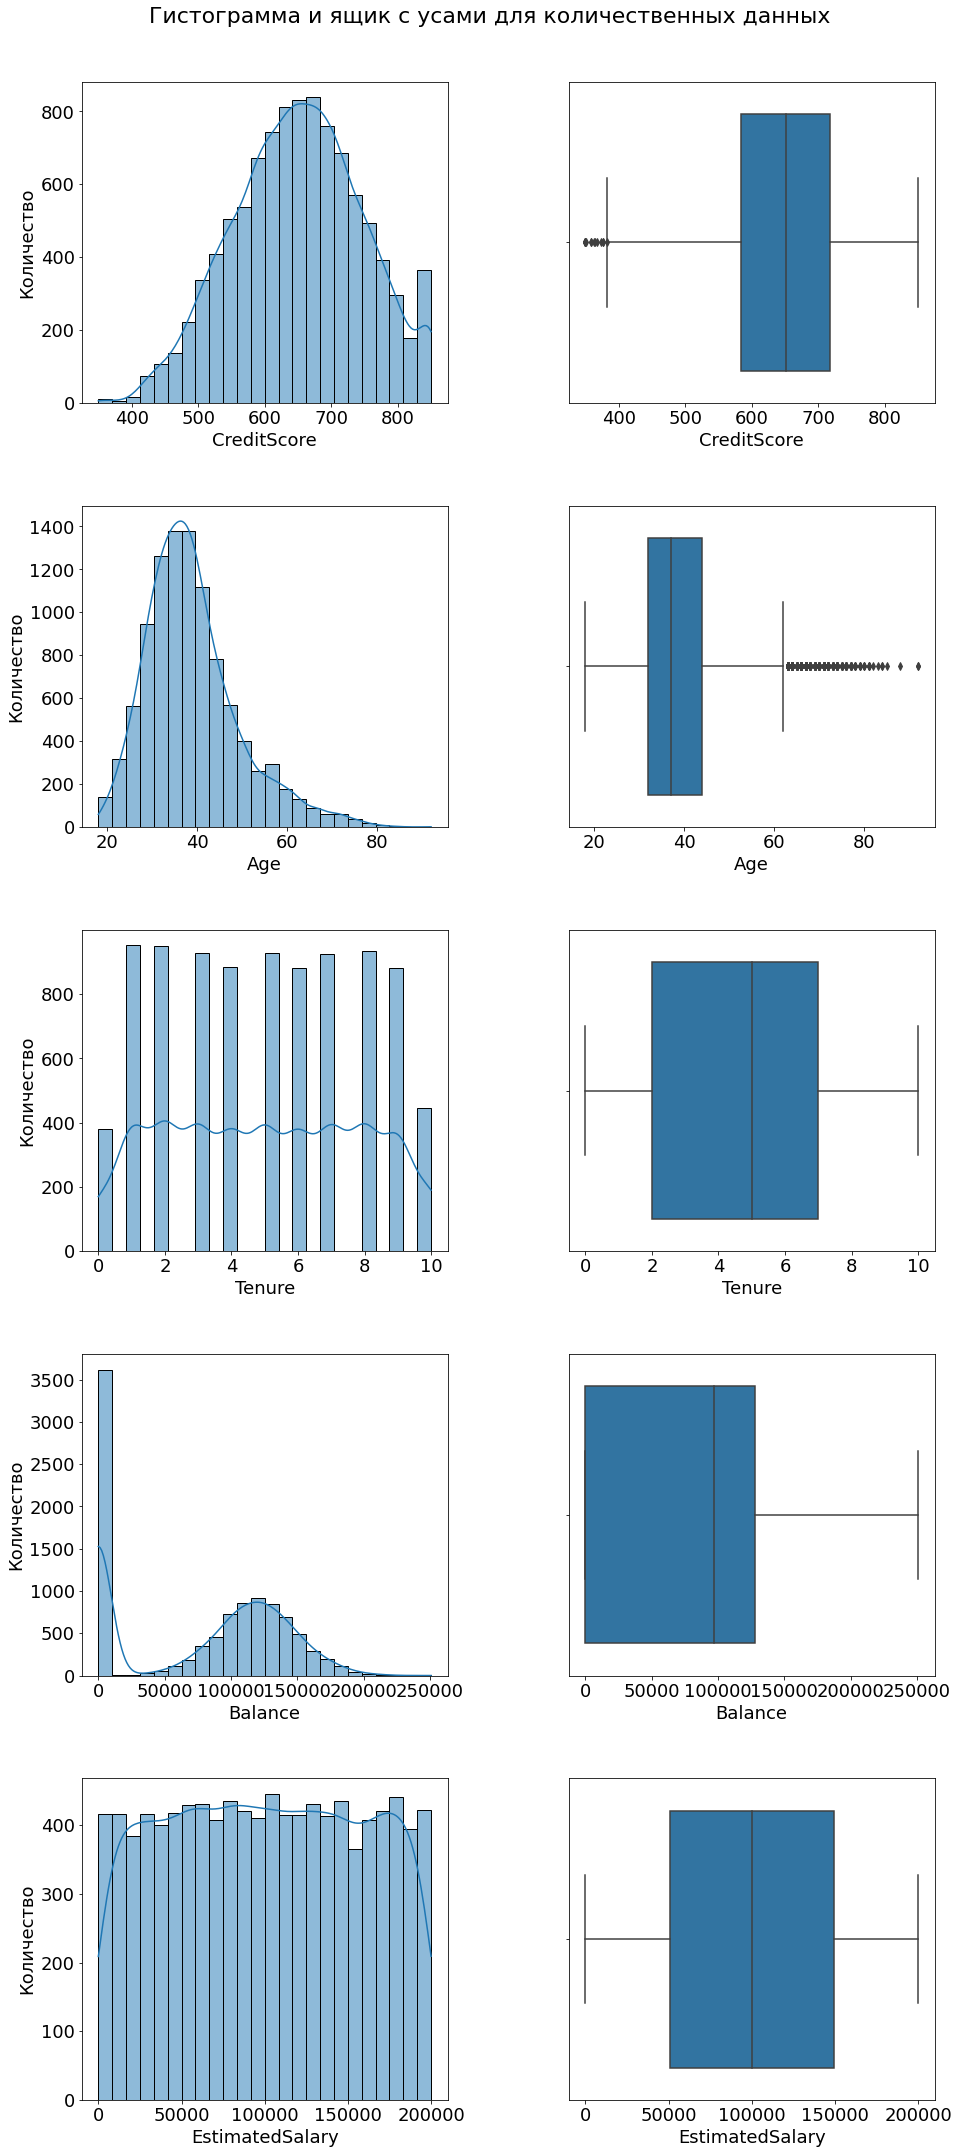

In [69]:
plot_hist(data, num_features)

In [70]:
# ГРАФИЧЕСКИЙ АНАЛИЗ категориальных данных
cat_features = data.select_dtypes(include=[object]).columns
cat_features = cat_features.drop(['Surname'])

cat_features_extra = pd.Index(['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'])

cat_features = cat_features.append([cat_features_extra])

# Проверка
cat_features

Index(['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'Exited'],
      dtype='object')

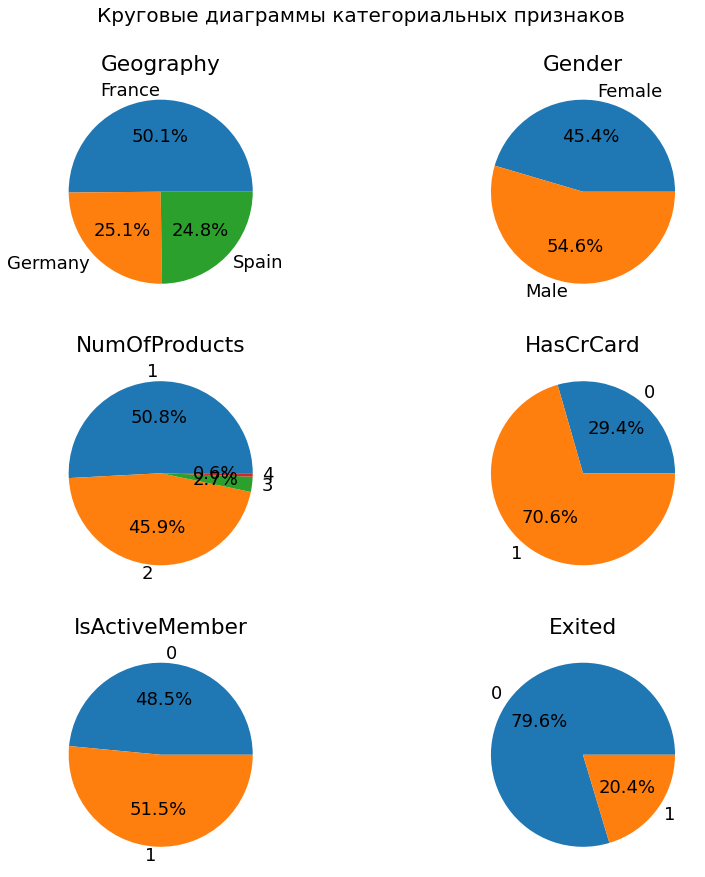

In [71]:
cat_graph(data, cat_features)

Исходя из полученных графиков и информации о датасете видно что в датасете есть пропущенные значения в столбце Tenure, доля пропущенных значений 9.1%. В датасете нету дубликатов и некорректных значений. Рассмотрим пропущенные значения.

In [72]:
# рассмотрим строки с пропущенным значение столбца Tenure
data[data['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Так как доля пропущенных значение в датасете меньше 10%, удалим эти скроки из датасета.

In [73]:
# удаляем строки с пропущенным значением
data = data.dropna(subset=['Tenure'])

In [74]:
# проверим, удалились ли пропуски
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


**Вывод: Данные в датасете обработы, удалены строки с пропущенными значениями, произведена проверка того, что в датасете нету дубликатов и некорректных значений. Можно приступать к исследованию.**

 ## Исследование задачи

### Исследование зависимостей между категориальными признаками и ушедшими клиентами

Проверим, есть ли какая-то зависимость между ушедшеми клиентами и другими признаками датасета. Для начала рассмотрим категориальные признаки.

In [75]:
# функция которая строит круговые диаграммы для заданного признака
def cat_graph_for_target(df, f1, f2):

    cols = df[f1].unique()
    n = len(cols)

    fig, axs = plt.subplots(1, n, figsize = (12,12))
    plt.tight_layout()

    for i in range(n):
      df1 = pd.DataFrame(df[df[f1] == cols[i]].groupby([f2])[f2].count())

      axs[i].pie(x=df1[f2], labels=df1.index, autopct='%1.1f%%')      
      axs[i].title.set_text(cols[i])
    
    #plt.suptitle("Ушедшие клиенты в по признаку " + f1, fontsize=22, y=1.01)
    plt.show()
    print()

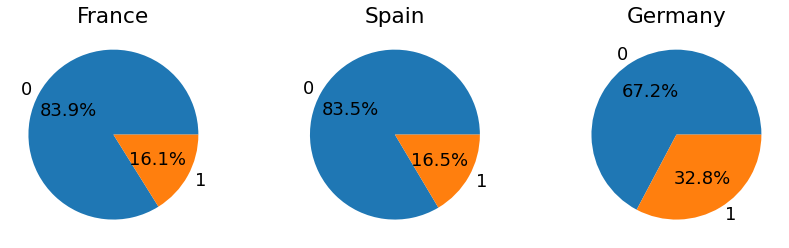

In [76]:
x1 = 'Geography'
x2 = 'Exited'
cat_graph_for_target(data, x1, x2)

Geography


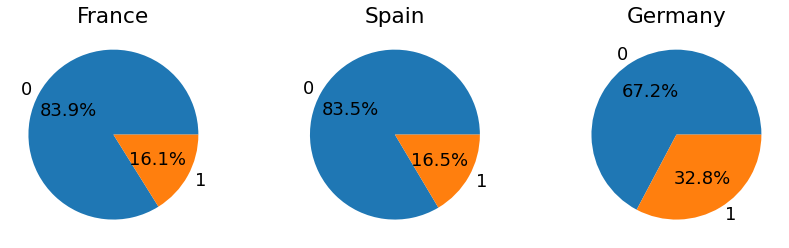


Gender


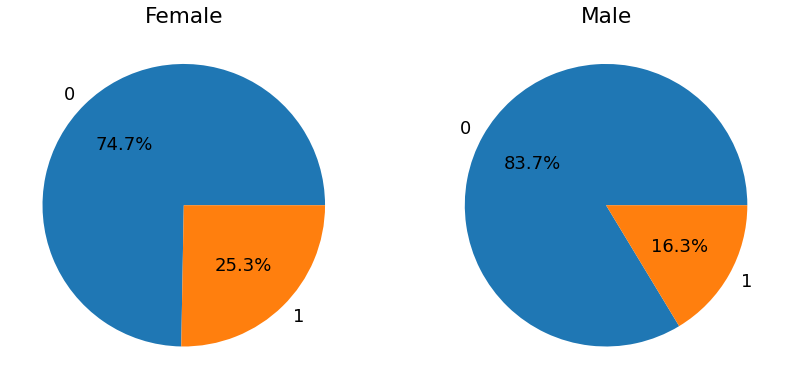


NumOfProducts


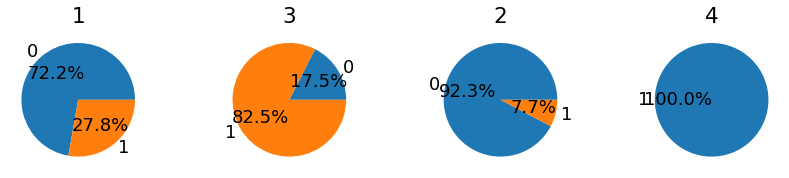


HasCrCard


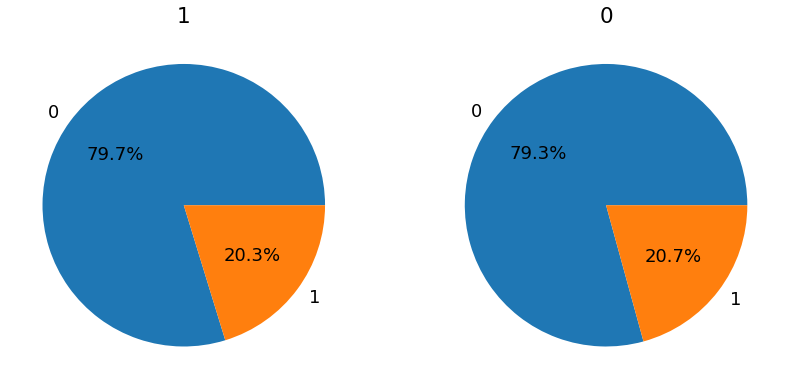


IsActiveMember


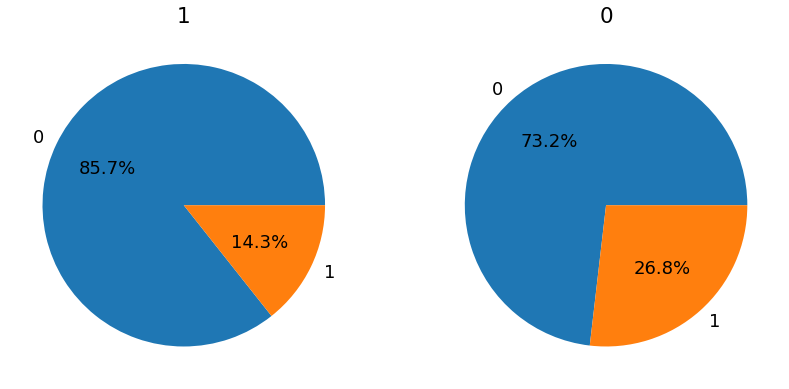

In [77]:
x2 = 'Exited'
cats = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

for cat in cats:
  print(cat)
  cat_graph_for_target(data, cat, x2)

Как видно из графиков, у клиентов из Германии в два раза больше процент ушедших клиентов (32.8%) чем у клиентов из Франции и Испании (16.1%, 16.5% соответсвенно). Доля ушедших клиентов женщин (25.3%) больше чем мужчин (16.3%).  У клиентов которые пользуются 3 продуктами очень большой процент ушедших клиентов (82.5%). Но сама группа пользователей с 3 продуктами малочисленная (2.7% от общих клиентов), поэтому не является репрезентативной. У клиентов пользующихся кредитными картами и не пользующихся крединтными картами процент ушедших клиентов одинаковый (около 20%). Среди активных клиентов банка процент ушедших клиентов меньше (14.3%) чем среди неактивных (26.8%). 

### Исследование зависимостей между колличественными признаками и ушедшими клиентами

Рассмотрим, есть ли какая-то зависимость между ушедшеми клиентами и количественными признаками.

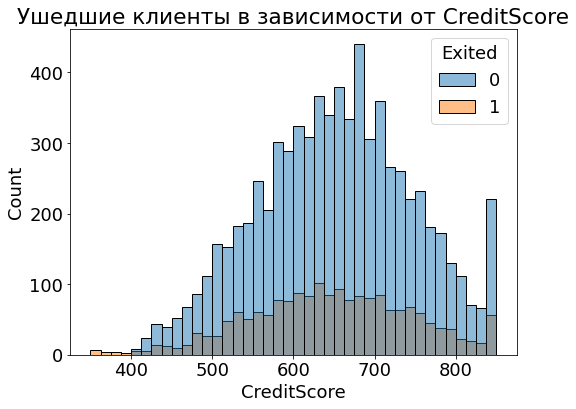

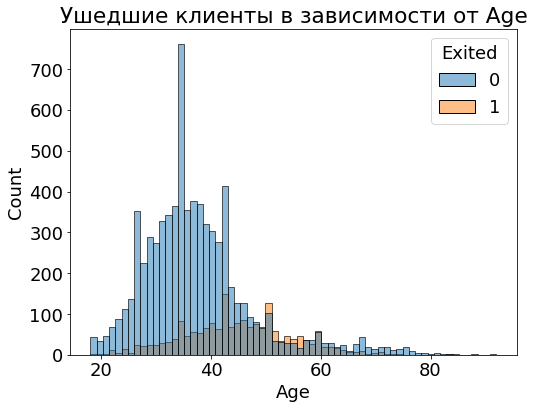

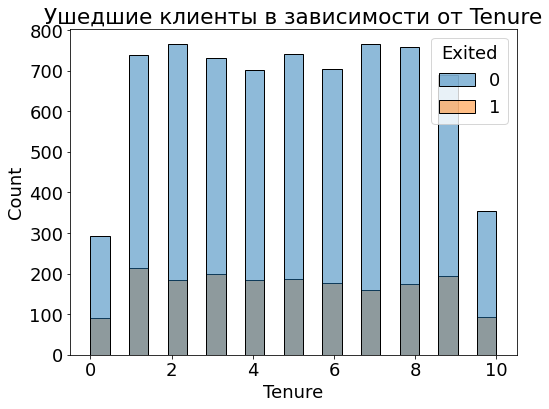

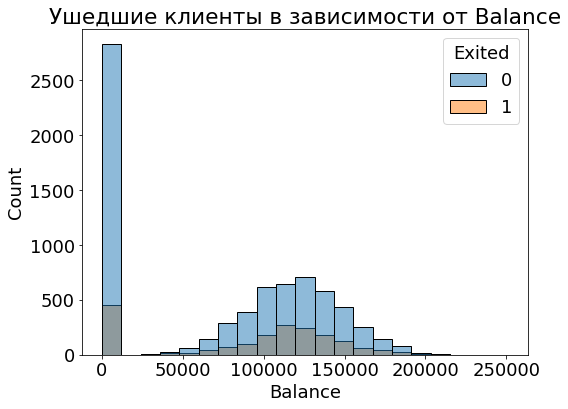

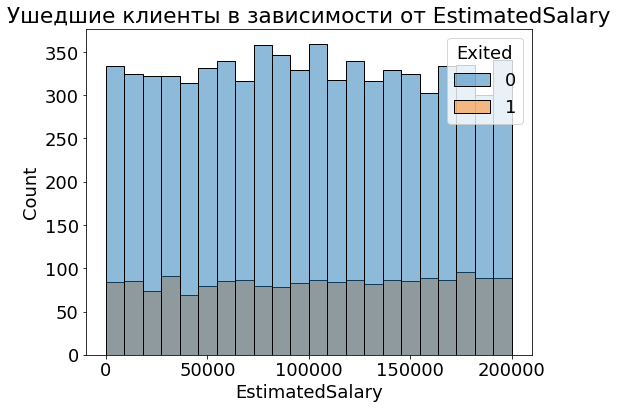

In [78]:
group = 'Exited'
for factor in num_features:
  plt.rcParams["figure.figsize"] = (8,6)
  sns.histplot(x= factor, hue = group, legend= True,
              data=data)
  plt.title('Ушедшие клиенты в зависимости от ' + factor)
  plt.show()
  print()

Как видим из графиков, для количественных признаков CreditScore, Tenure,Balance, EstimatedSalary гистограммы имеют похожий вид. Для возрастного признака, мы видим что большинство ушедших клиентов - более пожилые клиенты (пик гистограмы в районе 50 лет), тогда пик гистограммы большинства оставшихся клиентов в районе 35 лет.

**В ходе исследования задачи было выявлено что между некоторыми признаками и целевым параметром есть зависимости. Так, например у клиентов из Германии в два раза больше процент ушедших клиентов чем у клиентом из других стран. Также среди активных клиентов банка процент ушедших клиентов меньше (14.3%) чем среди неактивных (26.8%). Зависимости между данными изучены и можно приступать к построению модели машинного обучения.**

## Построение модели машинного обучения

В датасете есть категориальные признаки (столбцы Geography и Gender). Чтобы в дальнейшем обчучить модель необходимо преобразовать категориальные признаки в числовые. Используем для этого техника прямого кодирования. 

In [79]:
# удалим ненужные столбцы. Фамилия, id клиента и номер строки не влияют на то уйдет ли клиент
data_m = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data_m = pd.get_dummies(data_m, drop_first=True)

In [80]:
# проверим датасет
data_m.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8.0,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7.0,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4.0,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4.0,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2.0,134603.88,1,1,1,71725.73,0,0,0,1


In [81]:
# Создадим датасет с признакими, исключив из исходного датасета целевой признак
features = data_m.drop(['Exited'], axis=1)
# Создадим датасет с целевым признаком
target = data_m['Exited']

In [82]:
# Разделим данные. Так как нам нужно выделить три выборки: обучающую, валидационную и тестовую, \
# то нам нужно разделить данные в отношении 3:1:1.
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.4, random_state=12345) # отделим 40% данных для валидационной и тестовой выборки

In [83]:
# Разделим 40% данных пополам между валидационной и тестовой выборками (по 20% данных)
features_test, features_valid, target_test, target_valid = train_test_split(
    features_valid_test, target_valid_test, test_size=0.5, random_state=12345)

In [84]:
print('Размер обучающей выборки (признаки) -', features_train.shape[0])
print('Размер обучающей выборки (целевой признак) -', target_train.shape[0])
print('Размер тестовой выборки (признаки) -', features_test.shape[0])
print('Размер тестовой выборки (признаки) -', target_test.shape[0])
print('Размер валидационной выборки (признаки) -', features_valid.shape[0])
print('Размер валидационной выборки (признаки) -', target_valid.shape[0])

Размер обучающей выборки (признаки) - 5454
Размер обучающей выборки (целевой признак) - 5454
Размер тестовой выборки (признаки) - 1818
Размер тестовой выборки (признаки) - 1818
Размер валидационной выборки (признаки) - 1819
Размер валидационной выборки (признаки) - 1819


Так в датасете присутствуют количественные признаки с разными разбросами значений, отмасштабируем признаки.

In [85]:
# список количественных столбцов для масштабирования данных
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'NumOfProducts']

In [86]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

/tmp/ipykernel_272/3301989309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_272/3301989309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что scaler обучен только на трейне
</div>



In [87]:
# проверим данные
features_train.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9344,0.809075,-1.039327,-1.025995,0.554904,-0.908179,1,0,0.019508,0,0,0
3796,-1.152518,-1.227561,0.696524,0.480609,-0.908179,0,0,0.056167,0,0,1
7462,-0.398853,0.090079,1.385532,-1.237830,-0.908179,1,1,0.848738,0,0,1
1508,-0.749875,-0.286389,0.352020,-1.237830,0.809300,1,1,-0.894953,0,0,1
4478,-1.028628,-0.756975,-0.336987,-1.237830,0.809300,0,1,-1.284516,0,0,1


In [88]:
def best_model_f1(tree_depth, n_trees, iter, features_train, target_train, features_valid, target_valid):
  '''
  Функция находит значения гиперпараметров для наилучший модели для каждого типа моделей
  (модель решающего дерева, модель случайного леса, модель логистической регресии).
  На вход: значения гиперпараметров, тестовая и валидационная выборки.
  На выходе: значения F1-меры и гиперпаметров для наилучшей модели каждого типа моделей
  '''
  best_model_dtc = None
  best_result_dtc = 0
  best_depth = 0
  for depth in range(1, tree_depth):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # обучаем модель с заданной глубиной дерева
    model.fit(features_train, target_train) # обучаем модель на тренировочной выборке
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid) # посчитаем качество модели на валидационной выборке
    if result > best_result_dtc:
      best_depth = depth
      best_model_dtc = model # сохраняем наилучшую модель
      best_result_dtc = result # сохрасохраняемните наилучшее значение метрики accuracy на валидационных данных
      
  print("Значение F1-меры наилучшей модели решающего дерева на валидационной выборке:", best_result_dtc)
  
  probabilities_valid = model.predict_proba(features_valid)
  probabilities_one_valid = probabilities_valid[:, 1]
  auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
  print("Значение AUC-ROC наилучшей модели решающего дерева на валидационной выборке:",  auc_roc)
  print("Глубина дерева:", best_depth)
  print('###################################################################################################')


  best_model_rfc = None
  best_result_rfc = 0
  best_est = 0
  best_depth = 0
  for est in range(10, n_trees, 10):
    for depth in range (1, tree_depth):
        # обучаем модель с заданным количеством деревьев
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train) # обучаем модель на тренировочной выборке
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid) # посчитаем качество модели на валидационной выборке
        if result > best_result_rfc:
            best_model_rfc = model # сохраняем наилучшую модель
            best_result_rfc = result # сохраняем наилучшее значение метрики accuracy на валидационных данных
            best_est = est
            best_depth = depth

  print("Значение F1-меры наилучшей модели случайного леса на валидационной выборке:", best_result_rfc)
  
  probabilities_valid = model.predict_proba(features_valid)
  probabilities_one_valid = probabilities_valid[:, 1]
  auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
  print("Значение AUC-ROC наилучшей модели случайного леса на валидационной выборке:",  auc_roc)
  print("Количество деревьев:", best_est, "Максимальная глубина дерева:", best_depth)
  print('###################################################################################################')


  best_model_lr = None
  best_result_lr = 0
  best_iter = 0
  for iter in range(100, iter, 100):
    model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=iter) # обучаем модель
    model.fit(features_train, target_train) # обучаем модель на тренировочной выборке
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid) # посчитаем качество модели на валидационной выборке
    if result > best_result_lr:
        best_model_lr = model # сохраняем наилучшую модель
        best_result_lr = result # сохраняем наилучшее значение метрики accuracy на валидационных данных
        best_iter = iter

  print("Значение F1-меры наилучшей модели логистической регрессии на валидационной выборке:", best_result_lr)
  
  probabilities_valid = model.predict_proba(features_valid)
  probabilities_one_valid = probabilities_valid[:, 1]
  auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
  print("Значение AUC-ROC наилучшей модели логистической регрессии на валидационной выборке:",  auc_roc)
  print("Количество итераций:", best_iter)
  print('###################################################################################################')

  
  #выберем из трех типов моделей лучшую и сохраним ее в переменную best_model
  best_results = []
  best_result = 0
  best_model = None
  best_results.append(best_result_dtc)
  best_results.append(best_result_rfc)
  best_results.append(best_result_lr)
  for result in best_results:
    if result > best_result:
        best_result = result
  if best_results.index(best_result) == 0:
    best_model = best_result_dtc
  elif best_results.index(best_result) == 1:
    best_model = best_model_rfc
  elif best_results.index(best_result) == 2:
    best_model = best_model_lr
  
  return best_model



<div class="alert alert-block alert-info">
    
<b>Совет:</b> 
    
- Старайся такие большие ячейки/функции разбивать на маленькие, для читабельности - иначе становится сложно воспринимать от дебажить.
    
- Согласно PEP8, хорошим тоном писать отступы в 4 пробела https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#section-3
</div>


Найдем наилучшую модель для нашего исследования, выбирать модель будем по значниею метрики F1-меры.

In [89]:
# Задаем гиперпараметры
tree_depth = 11 #грубина дерева
n_trees = 51 #количество деревьев
iter = 1000 #количество итераций

# Найдем модель с наибольшим значением F1-меры на валидационной выборке
model = best_model_f1(tree_depth, n_trees, iter, features_train, target_train, features_valid, target_valid)

Значение F1-меры наилучшей модели решающего дерева на валидационной выборке: 0.5534804753820034
Значение AUC-ROC наилучшей модели решающего дерева на валидационной выборке: 0.7701827010410117
Глубина дерева: 7
###################################################################################################
Значение F1-меры наилучшей модели случайного леса на валидационной выборке: 0.5822784810126582
Значение AUC-ROC наилучшей модели случайного леса на валидационной выборке: 0.8620620725525358
Количество деревьев: 20 Максимальная глубина дерева: 10
###################################################################################################
Значение F1-меры наилучшей модели логистической регрессии на валидационной выборке: 0.3175965665236052
Значение AUC-ROC наилучшей модели логистической регрессии на валидационной выборке: 0.780939239386106
Количество итераций: 100
###################################################################################################


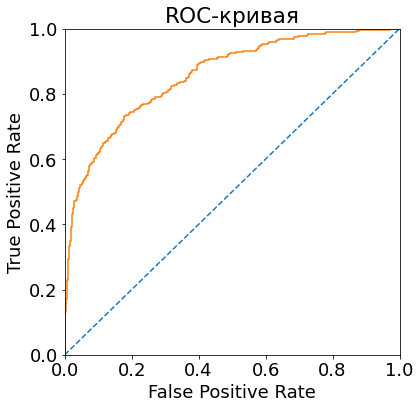

In [90]:
# построим ROC-кривую наилучшей модели до устранения дисбаланса классов
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure(figsize=(6, 6))

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

def roc_func (model, features_valid, target_valid):
  probabilities_valid = model.predict_proba(features_valid)
  probabilities_one_valid = probabilities_valid[:, 1]
  fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

  plt.figure(figsize=(6, 6))

  # ROC-кривая случайной модели (выглядит как прямая)
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.plot(fpr, tpr)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC-кривая')
  plt.show()


**Вывод: В разделе построения модели машинного обучения были  проверены три типа моделей (модель решающего дерева, модель случайного леса и модель логистической регресии). Обученные модели не соответстуют поставленной задачи. Наилучшее значение метрики F1-меры показала модель случайного леса со следующими гиперпараметрами: количество деревьев = 20, максимальная глубина дерева 10. Для этой модели значние F1-меры составило 0.58. Значение AUC-ROC для модели случайного леса составило 0.86. Необходимо дальнейшее улучшение модели. Так, как число клиентов прекративших пользоваться услугами банка в пять раз меньше чем число оставшихся клиенов, в данном случае наблюдается дисбаланс классов.**

## Борьба с дисбалансом

Для устранения дисбаланса классов увеличим класс клиентов, прекративних пользоваться услугами банка в пять раз.

In [91]:
# функция для увелечения выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [92]:
# сбалансируем классы, увеличив выборку ушедших клиентов в 5 раз
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Найдем наилучшую модель для нашего исследования, после устранения дисбаланса классов.

In [93]:
# Задаем гиперпараметры
tree_depth = 11 #грубина дерева
n_trees = 51 #количество деревьев
iter = 1000 #количество итераций

# Найдем модель с наибольшим значением Accuracy на валидационной выборке
model = best_model_f1(tree_depth, n_trees, iter, features_upsampled, target_upsampled, features_valid, target_valid)

Значение F1-меры наилучшей модели решающего дерева на валидационной выборке: 0.5653631284916201
Значение AUC-ROC наилучшей модели решающего дерева на валидационной выборке: 0.7489073647111795
Глубина дерева: 5
###################################################################################################
Значение F1-меры наилучшей модели случайного леса на валидационной выборке: 0.5989847715736041
Значение AUC-ROC наилучшей модели случайного леса на валидационной выборке: 0.8563970593943345
Количество деревьев: 40 Максимальная глубина дерева: 10
###################################################################################################
Значение F1-меры наилучшей модели логистической регрессии на валидационной выборке: 0.49653808110781406
Значение AUC-ROC наилучшей модели логистической регрессии на валидационной выборке: 0.7817349418166857
Количество итераций: 100
###################################################################################################


Как видно из значений F1-меры, качество моделей немного увеличилось. С помощью устранения дисбаланса классов нам удалось достигнуть целевой метрики F1-меры большей 0.59 в модели случайного леса с количеством деревьев 40 и максимальной глубиной дерева 10. Но значение AUC-ROC немного снизилось с 0.862 до 0.856.

Попробуем следуя поставленному заданию максимально улучшить нашу модель. Для этого будем подбирать значение порога классификации.

In [94]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_threshold = 0
best_f1 = 0

for threshold in np.arange(0, 1, 0.01):
    predicted_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_valid, predicted_valid)

    if f1 > best_f1:
      best_f1 = f1 # сохраняем наилучшее порога и метрики F1 на валидационных данных
      best_threshold = threshold

print("Порог = {:.2f} | F1-мера = {:.3f}".format(best_threshold, best_f1))

Порог = 0.61 | F1-мера = 0.615


Подбирая значения порога классификации, были найдено значение порога с максимальной F1-мерой, равной 0.615. Качество нашей модели можно улучшить, используя значение порога равное 0.61.

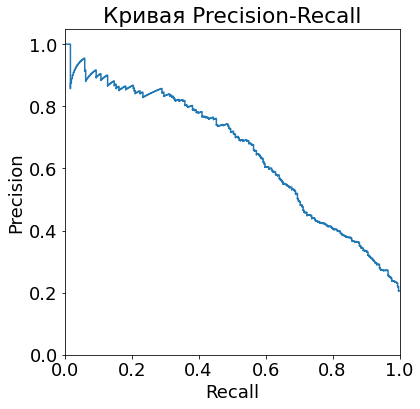

In [95]:
# построим PR-кривую для выбранной модели
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

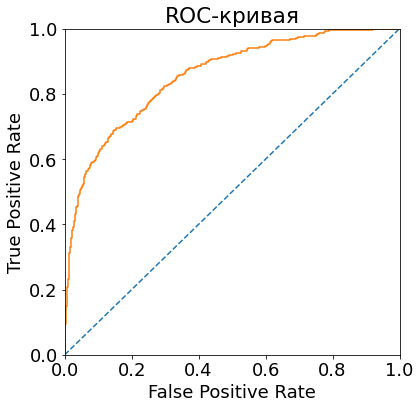

In [96]:
# построим ROC-кривую наилучшей модели после устранения дисбаланса классов
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure(figsize=(6, 6))

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [100]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("Значение AUC-ROC модели на валидационной выборке:",  auc_roc)

Значение AUC-ROC модели на валидационной выборке: 0.8551181132925003


**Вывод: После устранения дисбаланса классов посредством увеличения класса клиентов, прекративших обслуживание снова были проверены три типа моделей (модель решающего дерева, модель случайного леса и модель логистической регресии). Наилучшее значение метрики F1-меры показала модель случайного леса со следующими гиперпараметрами: количество деревьев = 40, максимальная глубина дерева 10. Для этой модели значние F1-меры составило 0.60. Значение AUC-ROC для модели случайного леса составило 0.86. Для дальнейшего улучшения качества модели было подобрано значение порога классификации. При значении порога классификации 0.61 значение целевой метрики F1-меры составило 0.62, но при этом значние AUC-ROC ненмого снизилось и составляет 0.86. Также дополнительно была построена ROC-кривую модели на валидационной выборке, демонстрирущая что наша модель демонстрирует лучшие значения метрик чем случайная модель.**


## Тестирование модели

Чтобы правильно оценить готовую модель проверим ее на тестовой выборке.

In [101]:
predicted_test = model.predict(features_test)

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)

result_test = f1_score(target_test, predicted_test) # посчитаем качество модели на тестовой выборке

print("Значение F1-меры модели на тестовой выборке:",  result_test)
print("Значение AUC-ROC модели на тестовой выборке:",  auc_roc)

Значение F1-меры модели на тестовой выборке: 0.6206896551724138
Значение AUC-ROC модели на тестовой выборке: 0.8619272278129871


Наша модель демонстрирует довольно хорошие показатели на тестовой выборке. Значение метрики F1-меры равно 0.62. Значение AUC-ROC равно 0.86. Целевое значение метрики достигнуто.

Проверим значение метрики F1 на тестовых данных со значением порога классификации, равным 0.61.

In [102]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test > best_threshold
result_test_threshold = f1_score(target_test, predicted_test)

print("Значение F1-меры модели на тестовой выборке:",  result_test_threshold)
print("Значение AUC-ROC модели на тестовой выборке:",  auc_roc)

Значение F1-меры модели на тестовой выборке: 0.6259097525473072
Значение AUC-ROC модели на тестовой выборке: 0.8619272278129871


Изменение значения порога классификации немного улучшило значение F1 меры модели на тестовой выборке. Теперь F1 мера равна 0.626.

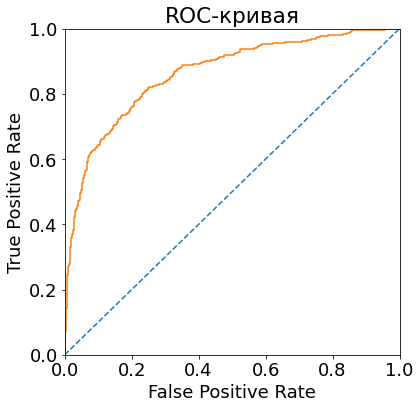

In [103]:
# построим ROC-кривую модели на тестовой выборке
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure(figsize=(6, 6))

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

**Вывод: Выбранная модель случайного леса была проверена на тестовой выборке. Модель показала хорошие результаты: значение F1-меры 0.62, значение AUC-ROC 0.86. Используя значение порога классификации 0.61 качество модели немного улучшилось. Заключительные метрики модели на тестовой выборке: значение F1-меры 0.63, значение AUC-ROC 0.86. Также дополнительно была построена ROC-кривую модели на тестовой выборке, демонстрирущая что наша модель демонстрирует лучшие значения метрик чем случайная модель.**

## Вывод

В рамках данного исследования были загружены и изучены данные об исторические поведении клиентов и расторжении договоров с банком. 
Были исследованы зависимости между категориальными и колличественными признаками: у клиентов из Германии в два раза больше процент ушедших клиентов чем у клиентом из других стран, среди активных клиентов банка процент ушедших клиентов меньше (14.3%) чем среди неактивных (26.8%). 
Были исследованы три типа моделей: модель решающего дерева, модель случайного леса и модель логистической регресии. Модели были обучены на тренировочной выборке и для каждого из типов моделей были найдены значения гиперпараметров, обеспечивабщие наибольшую долю правильных ответов на валидационной выборке. Наибольшее значение целевой метрики (F1-меры) показала модель случайного леса (значение F1-меры на валидационной выборке: 0.58; значение AUC-ROC на валидационной выборке: 0.86), что ниже поставленных условий (0.59). Для улучшения качества модели устранили дисбаланс классов посредством увеличения класса клиентов, прекративших обслуживание. Были проверены три типа моделей: модель решающего дерева, модель случайного леса и модель логистической регресии. Наибольшее значение целевой метрики (F1-меры) показала модель случайного леса (значение F1-меры на валидационной выборке: 0.60; значение AUC-ROC на валидационной выборке: 0.86), что выше поставленных условий (0.59). В дальнейшем для улувеличения целевой метрики (F1-меры) было подобрано значение порога классификации. Значение F1-меры увеличилось до 0.60; значение AUC-ROC осталось 0.86. Выбранная модель была проверена на тестовой выборке, где показатель значения F1-меры составило 0.63 (при подобраном значении порога классификации), значение AUC-ROC составило 0.86. Наша модель показала хорошие метрики и превысила целевое значение 0.59, а значит применение модели для задачи классификации (прогнозирования, ухода клиента из банка в ближайшее время) оправдана. В дальнейшем можно приступить к расчету экономического эффекта от внедрения модели.



